# INSTALAÇÃO DO PANDERA

In [3]:
pip install --quiet pandera

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --quiet openpyxl

Note: you may need to restart the kernel to use updated packages.


# IMPORTAÇÃO BIBLIOTECAS

In [1]:
import pandas as pd
import pandera as pa

# IMPORTAÇÃO DE TABELAS DE SP DOS ANOS DE 2020 E 2021

  ## PRIMEIRA TABELA
  
 No arquivo de Excel de SP, do ano de 2020, foi verificado que não havia uma tabela geral como no arquivo do ano de 2021. Para dar continuidade é preciso concatenar as tabelas de cada aba deste arquivo excel.

In [67]:
#CAMINHO DO ARQUIVO
xls = pd.ExcelFile('gs://projeto_final_2021/entrada/SP/folhas-de-pagamento-da-administracao-indireta-2020.xlsx')

#CRIAÇÃO DO DATAFRAME
df = pd.DataFrame()

#CONCATENAÇÃO DE TODAS AS TABELAS (ANO DE 2020) POR MEIO DE UM LOOP
for i in range(0,20):
    tabela = pd.read_excel(xls, sheet_name=i)
    df = pd.concat([df, tabela], axis=0, ignore_index=True)

#COM SHEET_NAME FOI POSSÍVEL CHAMAR CADA ABA DO EXCEL POR MEIO DE ÍNDICES
#AXIS = 0 INDICA QUE A CONCATENAÇÃO SERÁ FEITA PELO EIXO X (LINHAS)

  ## SEGUNDA TABELA
  
 Neste arquivo de Excel de SP do ano de 2021, como mencionado anteriormente, há um arquivo geral para ser selecionado entre algumas das abas presente no arquivo.

In [68]:
#CAMINHO DO ARQUIVO
xls2 = pd.ExcelFile('gs://projeto_final_2021/entrada/SP/entes-unificadosateagosto2021.xlsx')

#TABELA (ANO DE 2021) PARA DATAFRAME
df2 = pd.read_excel(xls2, sheet_name=0)

# CONCATENAÇÃO DE TABELAS DOS ANOS 2020 E 2021

 ## INCONSISTÊNCIA ENCONTRADA

Foi observado que há "espaço" antes do no nome de algumas das colunas no df2. Isso será solucionado alterando o nome de cada uma dessas colunas. Primeiro foi preciso tratar destas inconsistências antes de dar procedimento.

In [69]:
#COMPARANDO NOME DAS COLUNAS
#df.dtypes
df2.dtypes

 EMPRESA                 object
 MÊS                      int64
 ANO                      int64
 NOME                    object
 CARGO                   object
 LOTAÇÃO                 object
ADMISSÃO                 object
 NASCIMENTO             float64
 VENCIMENTOS             object
 ENCARGOS                object
 BENEFÍCIOS              object
 OUTRAS REMUNERAÇÕES     object
VÍNCULO                  object
DETALHE VÍNCULO          object
LIMINAR                  object
Unnamed: 15              object
dtype: object

In [70]:
#ELIMINANDO INCONSISTÊNCIAS NO NOME DAS COLUNAS
df2.rename(columns={
    ' EMPRESA':'EMPRESA',
    ' MÊS':'MÊS',
    ' ANO':'ANO',
    ' NOME':'NOME',
    ' CARGO':'CARGO',
    ' LOTAÇÃO':'LOTAÇÃO',
    ' NASCIMENTO':'NASCIMENTO',
    ' VENCIMENTOS':'VENCIMENTOS',
    ' ENCARGOS':'ENCARGOS',
    ' BENEFÍCIOS':'BENEFÍCIOS',
    ' OUTRAS REMUNERAÇÕES':'OUTRAS REMUNERAÇÕES'
}, inplace=True)

 ## CONCATENAÇÃO

In [71]:
df_tds = pd.concat([df,df2], axis=0, ignore_index=True)

In [72]:
df_tds

,EMPRESA,MÊS,ANO,NOME,CARGO,LOTAÇÃO,ADMISSÃO,NASCIMENTO,VENCIMENTOS,ENCARGOS,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,ADESAMPA,1,2020,ALESSANDRA SERAPOMBA A. BRAYN,Sup. Adm Financeiro,SEDE,2019-02-06 00:00:00,1974.0,5964.83,2656.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADESAMPA,1,2020,ALINE DIAS MARTINS,Analista I,SEDE,2018-04-02 00:00:00,1987.0,4906.81,2152.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADESAMPA,1,2020,ANA MARIA M. CAIRES,Gestor(a) de Recursos Humanos,SEDE,2016-03-14 00:00:00,1961.0,4439.44,2466.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADESAMPA,1,2020,ANA PAULA DE BARROS RODRIGUES,Sup. Relações Institucionais,SEDE,2019-02-04 00:00:00,1982.0,10613.94,4843.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADESAMPA,1,2020,ARMANDO DE ALMEIDA P.JUNIOR,Assessor III,SEDE,2018-08-01 00:00:00,1982.0,8027.08,3588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491432,TMSP,8,2021,RICARDO MASSAHAKU FUKUDA,PROFESSOR DE ORQUESTRA,Diretoria de Formação,2013-05-17 00:00:00,1963.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491433,TMSP,8,2021,ROBERTO ALVES RODRIGUES DE ARAUJO,PROFESSOR DE ORQUESTRA,Diretoria de Formação,2013-05-17 00:00:00,1964.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491434,TMSP,8,2021,SAMANTHA VALENCIO,ASSESSOR TECNICO,Gabinete do Diretor,2021-04-07 00:00:00,1983.0,880.74,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491435,TMSP,8,2021,VIVIANE BITTENCOURT,SUPERVISOR TECNICO II,Supervisão de Recursos Humanos,2017-10-26 00:00:00,1974.0,876.64,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# LIMPEZA

## COLUNA IMPREVISTA

Não era prevista a existência das colunas "Unnamed: 15", "Unnamed: 16" a diante, por essa razão serão descartadas.

In [73]:
lista_nome_colunas = list(df_tds.columns)

In [74]:
del(lista_nome_colunas[0:15])

In [75]:
lista_nome_colunas

['Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25']

In [76]:
for nome in lista_nome_colunas:
    df_tds.drop(nome, axis=1, inplace=True)

## VERIFICANDO INCONSISTÊNCIAS NOS DADOS

Por conta de divergências no data frame foi necessário que o tipo de dado de todas as colunas fossem convertidos em string para então serem tratados.

In [77]:
df_tds = df_tds.astype(str)

In [78]:
#VERIFICAÇÃO DE DADOS NULOS NO DF
df_tds.isna().sum()

EMPRESA                0
MÊS                    0
ANO                    0
NOME                   0
CARGO                  0
LOTAÇÃO                0
ADMISSÃO               0
NASCIMENTO             0
VENCIMENTOS            0
ENCARGOS               0
BENEFÍCIOS             0
OUTRAS REMUNERAÇÕES    0
VÍNCULO                0
DETALHE VÍNCULO        0
LIMINAR                0
dtype: int64

Nesta etapa do processo é preciso ser feito a análise dos dados de todas as colunas presentes no DF

In [92]:
sorted(pd.unique(df_tds["VENCIMENTOS"]))
#pd.unique(df_tds["VENCIMENTOS"])

['',
 '0',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.16',
 '0.18',
 '0.19',
 '0.2',
 '0.21',
 '0.22',
 '0.24',
 '0.25',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.3',
 '0.31',
 '0.32',
 '0.33',
 '0.36',
 '0.38',
 '0.4',
 '0.41',
 '0.42',
 '0.44',
 '0.46',
 '0.47',
 '0.48',
 '0.52',
 '0.53',
 '0.54',
 '0.55',
 '0.57',
 '0.6',
 '0.61',
 '0.62',
 '0.64',
 '0.65',
 '0.69',
 '0.7',
 '0.71',
 '0.72',
 '0.74',
 '0.79',
 '0.8',
 '0.81',
 '0.82',
 '0.84',
 '0.85',
 '0.86',
 '0.88',
 '0.89',
 '0.92',
 '0.94',
 '0.95',
 '0.97',
 '0.98',
 '0.99',
 '1',
 '1.03',
 '1.04',
 '1.08',
 '1.11',
 '1.12',
 '1.13',
 '1.2',
 '1.21',
 '1.22',
 '1.23',
 '1.24',
 '1.25',
 '1.3',
 '1.31',
 '1.32',
 '1.36',
 '1.37',
 '1.38',
 '1.39',
 '1.4',
 '1.41',
 '1.43',
 '1.45',
 '1.48',
 '1.49',
 '1.5',
 '1.51',
 '1.52',
 '1.55',
 '1.56',
 '1.64',
 '1.65',
 '1.7',
 '1.76',
 '1.83',
 '1.85',
 '1.89',
 '1.96',
 '10',
 '10.17',
 '10.2',
 '10.33',
 '10

## SOLUCIONANDO INCONSISTÊNCIAS

### NOME

Foi observado que havia espaço em apenas um nome nesta coluna, que foi solucionado da seguinte maneira:

In [85]:
df_tds.NOME.replace(' FABIANA MARTINS CORREA', 'FABIANA MARTINS CORREA', inplace=True)

### CARGO

Foi observado que havia somente um caso de hífen no início de um cargo nesta coluna, que foi solucionado da seguinte maneira:

In [86]:
df_tds.CARGO.replace('-PROFESSOR DE ENSINO TECNICO - NIVEL I', 'PROFESSOR DE ENSINO TECNICO - NIVEL I', inplace=True)

### ADMISSÃO

In [87]:
df_tds.loc[df_tds.ANO == "2021", ['ADMISSÃO']] = pd.NA

### NASCIMENTO

Na coluna nascimento há dados nulos que serão convertidos para zero como não informados.

In [88]:
df_tds["NASCIMENTO"] = [f[:4] for f in df_tds.loc[:,'NASCIMENTO']]
df_tds["NASCIMENTO"] = df_tds["NASCIMENTO"].map(lambda x: x.replace("nan","0"))

### VENCIMENTOS

Números com casas decimais separadas por vírgula, diversos zeros e negativos, R$, e diversos erros.

In [89]:
df_tds["VENCIMENTOS"] = [f.strip("R\$").strip("-R\$").strip(" R\$-").strip(" R\$-   ").strip(" ") for f in df_tds.loc[:,'VENCIMENTOS']]
df_tds["VENCIMENTOS"] = df_tds["VENCIMENTOS"].map(lambda x: x if not "," in x else x.replace(".","").replace(",","."))

In [90]:
df.VENCIMENTOS

0          5964.83
1          4906.81
2          4439.44
3         10613.94
4          8027.08
            ...   
268067           0
268068           0
268069           0
268070     1501.56
268071           0
Name: VENCIMENTOS, Length: 268072, dtype: object

### ENCARGOS

In [93]:
df_tds["ENCARGOS"] = [f.strip("R\$").strip("-R\$").strip(" R\$-").strip(" R\$-   ").strip(" ") for f in df_tds.loc[:,'ENCARGOS']]
df_tds["ENCARGOS"] = df_tds["ENCARGOS"].map(lambda x: x if not "," in x else x.replace(".","").replace(",","."))

### BENEFÍCIOS

In [94]:
df_tds["BENEFÍCIOS"] = [f.strip("R\$").strip("-R\$").strip(" R\$-").strip(" R\$-   ").strip(" ") for f in df_tds.loc[:,'BENEFÍCIOS']]
df_tds["BENEFÍCIOS"] = df_tds["BENEFÍCIOS"].map(lambda x: x if not "," in x else x.replace(".","").replace(",","."))

### OUTRAS REMUNERAÇÕES

In [95]:
df_tds["OUTRAS REMUNERAÇÕES"] = [f.strip("R\$").strip("-R\$").strip(" R\$-").strip(" R\$-   ").strip(" ") for f in df_tds.loc[:,'OUTRAS REMUNERAÇÕES']]
df_tds["OUTRAS REMUNERAÇÕES"] = df_tds["OUTRAS REMUNERAÇÕES"].map(lambda x: x if not "," in x else x.replace(".","").replace(",","."))

### LIMINAR

Retirando os conchetes.

In [96]:
df_tds["LIMINAR"] = [f.strip("[").strip("]") for f in df_tds.loc[:,'LIMINAR']]

### TRANFORMANDO "-", "nan", "", " " EM DADOS NULOS

In [97]:
df_tds.replace(['-','nan','',' '], pd.NA, inplace=True)
df_tds.replace(['',' '], "0", inplace=True)

# TRANSFORMAÇÃO DE DADOS

In [98]:
df_tds.dtypes

EMPRESA                object
MÊS                    object
ANO                    object
NOME                   object
CARGO                  object
LOTAÇÃO                object
ADMISSÃO               object
NASCIMENTO             object
VENCIMENTOS            object
ENCARGOS               object
BENEFÍCIOS             object
OUTRAS REMUNERAÇÕES    object
VÍNCULO                object
DETALHE VÍNCULO        object
LIMINAR                object
dtype: object

In [99]:
#TRANSFORMAR COLUNAS PARA INT
colunas_int = ["MÊS","ANO","NASCIMENTO"]

for C in colunas_int:
    df_tds[C] = pd.to_numeric(df_tds[C])
    
#COLUNAS PARA FLOAT
colunas_float = ["VENCIMENTOS","ENCARGOS","BENEFÍCIOS","OUTRAS REMUNERAÇÕES"]

for C in colunas_float:
    df_tds[C] = pd.to_numeric(df_tds[C])

#COLUNA PARA DATATIME
df_tds["ADMISSÃO"] = pd.to_datetime(df_tds["ADMISSÃO"])


In [100]:
df_tds.dtypes

EMPRESA                        object
MÊS                             int64
ANO                             int64
NOME                           object
CARGO                          object
LOTAÇÃO                        object
ADMISSÃO               datetime64[ns]
NASCIMENTO                      int64
VENCIMENTOS                   float64
ENCARGOS                      float64
BENEFÍCIOS                    float64
OUTRAS REMUNERAÇÕES           float64
VÍNCULO                        object
DETALHE VÍNCULO                object
LIMINAR                        object
dtype: object

# PANDERA

In [101]:
schema = pa.DataFrameSchema(
    columns = {
        "EMPRESA":pa.Column(pa.String,pa.Check.str_length(2,15)),
        "MÊS":pa.Column(pa.Int),
        "ANO":pa.Column(pa.Int),
        "NOME":pa.Column(pa.String,pa.Check.str_length(0,150), nullable=True),
        "CARGO":pa.Column(pa.String,pa.Check.str_length(0,100), nullable=True),
        "LOTAÇÃO":pa.Column(pa.String,pa.Check.str_length(0,100), nullable=True),
        "ADMISSÃO":pa.Column(pa.DateTime, nullable=True),
        "NASCIMENTO":pa.Column(pa.Int, nullable=True),
        "VENCIMENTOS":pa.Column(pa.Float, nullable=True),
        "ENCARGOS":pa.Column(pa.Float, nullable=True),
        "BENEFÍCIOS":pa.Column(pa.Float, nullable=True),
        "OUTRAS REMUNERAÇÕES":pa.Column(pa.Float, nullable=True),
        "VÍNCULO":pa.Column(pa.String,pa.Check.str_length(0,100), nullable=True),
        "DETALHE VÍNCULO":pa.Column(pa.String,pa.Check.str_length(0,100), nullable=True),
        "LIMINAR":pa.Column(pa.String,pa.Check.str_length(0,100), nullable=True)
    }
)

In [102]:
schema.validate(df_tds)

,EMPRESA,MÊS,ANO,NOME,CARGO,LOTAÇÃO,ADMISSÃO,NASCIMENTO,VENCIMENTOS,ENCARGOS,BENEFÍCIOS,OUTRAS REMUNERAÇÕES,VÍNCULO,DETALHE VÍNCULO,LIMINAR
0,ADESAMPA,1,2020,ALESSANDRA SERAPOMBA A. BRAYN,Sup. Adm Financeiro,SEDE,2019-02-06,1974,5964.83,2656.28,625.01,0.0,CLT: contrato por tempo indeterminado,Não concursado ocupante de cargo em comissão,<NA>
1,ADESAMPA,1,2020,ALINE DIAS MARTINS,Analista I,SEDE,2018-04-02,1987,4906.81,2152.80,777.26,0.0,CLT: contrato por tempo indeterminado,Não concursado NÃO ocupante de cargo em comissão,<NA>
2,ADESAMPA,1,2020,ANA MARIA M. CAIRES,Gestor(a) de Recursos Humanos,SEDE,2016-03-14,1961,4439.44,2466.83,974.68,0.0,CLT: contrato por tempo indeterminado,Não concursado NÃO ocupante de cargo em comissão,<NA>
3,ADESAMPA,1,2020,ANA PAULA DE BARROS RODRIGUES,Sup. Relações Institucionais,SEDE,2019-02-04,1982,10613.94,4843.80,946.25,0.0,CLT: contrato por tempo indeterminado,Não concursado ocupante de cargo em comissão,<NA>
4,ADESAMPA,1,2020,ARMANDO DE ALMEIDA P.JUNIOR,Assessor III,SEDE,2018-08-01,1982,8027.08,3588.00,772.73,0.0,CLT: contrato por tempo indeterminado,Não concursado ocupante de cargo em comissão,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491432,TMSP,8,2021,RICARDO MASSAHAKU FUKUDA,PROFESSOR DE ORQUESTRA,Diretoria de Formação,NaT,1963,0.00,0.00,431.86,0.0,Servidor público cedido por outro ente: Servid...,Concursado NÃO ocupante de cargo em comissão,<NA>
491433,TMSP,8,2021,ROBERTO ALVES RODRIGUES DE ARAUJO,PROFESSOR DE ORQUESTRA,Diretoria de Formação,NaT,1964,0.00,0.00,431.86,0.0,Servidor público cedido por outro ente: Servid...,Concursado NÃO ocupante de cargo em comissão,<NA>
491434,TMSP,8,2021,SAMANTHA VALENCIO,ASSESSOR TECNICO,Gabinete do Diretor,NaT,1983,880.74,0.00,979.76,0.0,Servidor público cedido por outro ente: Servid...,Não concursado ocupante de cargo em comissão,<NA>
491435,TMSP,8,2021,VIVIANE BITTENCOURT,SUPERVISOR TECNICO II,Supervisão de Recursos Humanos,NaT,1974,876.64,0.00,938.70,0.0,Servidor público cedido por outro ente: Servid...,Não concursado ocupante de cargo em comissão,<NA>


# OTIMIZAÇÃO DE MEMÓRIA

In [103]:
df_obj = df_tds.select_dtypes('object')

In [104]:
# Instanciando um novo DF
converted_obj = pd.DataFrame()
# Iterar em cada coluna no DF de dtype = OBJECT
for col in df_obj.columns:
    # Contar numero de valores unicos
    num_unique_values = len(df_obj[col].unique())
    # Contar o numero total de valores
    num_total_values = len(df_obj[col])
    # Se os valores unicos forem menores que 50% do total...
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    # Se nao forem, permanecem os mesmos.

In [105]:
# Total de memória reduzida
def mem_usage(pandas_obj:pd.DataFrame)->float:
    '''
    Esta função retorna a memória do dataframe.
    '''
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # Assumindo que se não for um DF é uma série
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # Convertendo bits para megabytes
    return "{:03.2f} MB".format(usage_mb)

In [106]:
# Comparação entre "antes" e "depois"
print(mem_usage(df_obj))
print(mem_usage(converted_obj))
compare_obj = pd.concat([df_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

259.01 MB
7.44 MB


,before,after
object,7.0,NaN
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0


In [108]:
df_final = df_tds.copy()

In [111]:
#Voltar informações para o data frame principal
nome_colunas = list(converted_obj.columns)
for C in nome_colunas:
    df_final[C] = converted_obj[C]

In [113]:
#OTIMIZAR COLUNAS INT
colunas_int = list(df_tds.select_dtypes('int').columns)

for C in colunas_int:
    df_final[C] = pd.to_numeric(df_tds[C], downcast='integer')
    
#OTIMIZAR COLUNAS FLOAT
colunas_float = list(df_tds.select_dtypes('float').columns)

for C in colunas_float:
    df_final[C] = pd.to_numeric(df_tds[C], downcast='float')

In [114]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491437 entries, 0 to 491436
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   EMPRESA              491437 non-null  category      
 1   MÊS                  491437 non-null  int8          
 2   ANO                  491437 non-null  int16         
 3   NOME                 490935 non-null  category      
 4   CARGO                491102 non-null  category      
 5   LOTAÇÃO              490999 non-null  category      
 6   ADMISSÃO             384508 non-null  datetime64[ns]
 7   NASCIMENTO           491437 non-null  int16         
 8   VENCIMENTOS          478571 non-null  float32       
 9   ENCARGOS             288791 non-null  float32       
 10  BENEFÍCIOS           296417 non-null  float32       
 11  OUTRAS REMUNERAÇÕES  249187 non-null  float32       
 12  VÍNCULO              293456 non-null  category      
 13  DETALHE VÍNCUL

# PLOT

<AxesSubplot:title={'center':'Distribuição de salário dos servidores'}, ylabel='Frequency'>

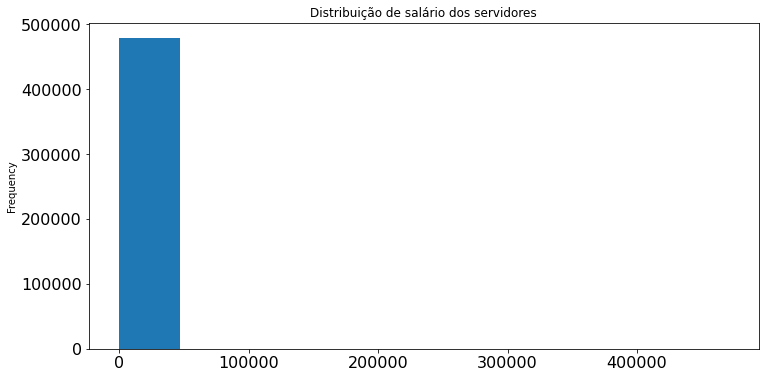

In [116]:
df_final['VENCIMENTOS'].plot(kind='hist', 
                             xlabel='Salário', 
                             ylabel='Frequência',
                             title='Distribuição de salário dos servidores',
                             fontsize=16,
                             figsize=(12,6))

# Exportação para extensão Parquet

In [30]:
df_final.to_parquet('gs://projeto_final_2021/pandas_to_parquet/SP_parquet/df_SP.snappy', compression='snappy')